In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/63670195/interpolation-of-missing-temperature-data-in-python

In [2]:
t = np.linspace(0, 30*2*np.pi, 30*24*2)
td = pd.date_range("2020-01-01", freq='30T', periods=t.size)

In [3]:
T0 = np.sin(t)*8 - 15 + np.random.randn(t.size)*0.2
T1 = np.sin(t)*7 - 13 + np.random.randn(t.size)*0.1
T2 = np.sin(t)*9 - 10 + np.random.randn(t.size)*0.3
T3 = np.sin(t)*8.5 - 11 + np.random.randn(t.size)*0.5

In [4]:
T = np.vstack([T0, T1, T2, T3]).T

In [5]:
features = pd.DataFrame(T, columns=["s1", "s2", "s3", "s4"], index=td)

In [6]:
features

,s1,s2,s3,s4
2020-01-01 00:00:00,-14.857658,-13.058844,-9.983681,-10.785141
2020-01-01 00:30:00,-14.232208,-12.151413,-9.060086,-9.693404
2020-01-01 01:00:00,-12.806154,-11.146089,-7.539096,-8.083052
2020-01-01 01:30:00,-12.147786,-10.446614,-6.004957,-7.698700
2020-01-01 02:00:00,-10.880096,-9.614560,-5.050200,-7.286627
...,...,...,...,...
2020-01-30 21:30:00,-19.044382,-16.542374,-14.369220,-15.654071
2020-01-30 22:00:00,-17.841568,-15.642807,-13.322184,-15.344442
2020-01-30 22:30:00,-17.162024,-14.880792,-12.583558,-13.246422
2020-01-30 23:00:00,-16.221091,-13.895482,-11.540854,-11.245364


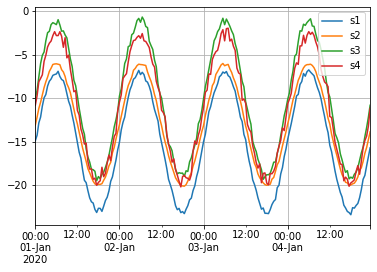

In [7]:
axe = features[:"2020-01-04"].plot()
axe.legend()
axe.grid()

In [8]:
target = features.pop("s4")

In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.25, random_state=123)

In [11]:
reg = linear_model.LinearRegression()

In [12]:
reg.fit(x_train, y_train)

LinearRegression()

In [13]:
reg.score(x_test, y_test)

0.9926150729585087

In [14]:
ypred = reg.predict(x_test)

In [15]:
ypred = pd.DataFrame(ypred, index=x_test.index, columns=["s4p"])

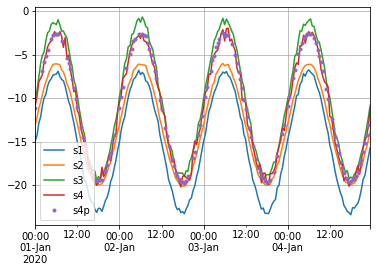

In [16]:
axe = features[:"2020-01-04"].plot()
target[:"2020-01-04"].plot(ax=axe)
ypred[:"2020-01-04"].plot(ax=axe, linestyle='None', marker='.')
axe.legend()
axe.grid()

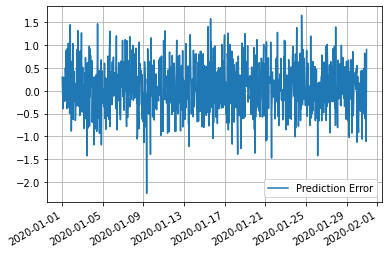

In [17]:
error = (y_test - ypred.squeeze())
axe = error.plot()
axe.legend(["Prediction Error"])
axe.grid()